In [1]:
# Importing necessary libraries
import cv2
import numpy as np
import os
import pywt
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow

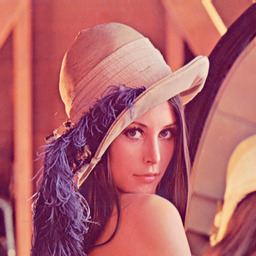

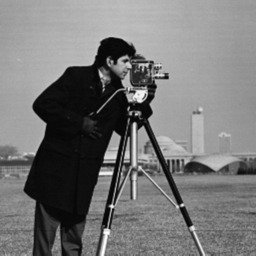

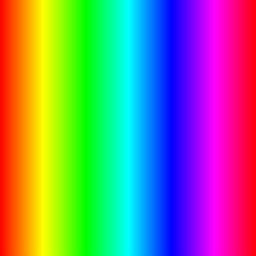

In [2]:
# Input Images
# Lenna and Cameraman
image1 = cv2.imread('Lenna.jpeg')
image2 = cv2.imread('Cameraman.jpeg')
image3 = cv2.imread('RGB Colors.jpeg') 
cv2_imshow(image1)
cv2_imshow(image2)
cv2_imshow(image3)

# Input Video
# Traffic Management


**Phase-I**

1. **Basics of images** and **2D signal handling**


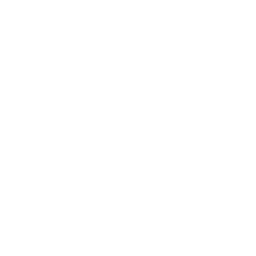

In [3]:
# Pattern 1
pattern1 = np.full((256,256),255,dtype=np.uint8)
cv2_imshow(pattern1)

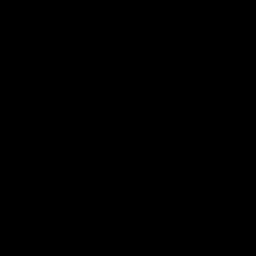

In [4]:
# Pattern 2
pattern2 = np.zeros([256,256],dtype=np.uint8)
cv2_imshow(pattern2)

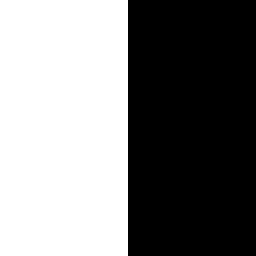

In [5]:
# Pattern 3
pattern3 = np.zeros([256,256],dtype=np.uint8)
pattern3[0:256,0:128] = 255
cv2_imshow(pattern3)

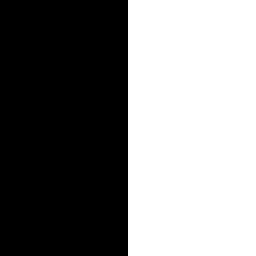

In [6]:
# Pattern 4
pattern4 = np.zeros([256,256],dtype=np.uint8)
pattern4[0:256,128:256] = 255
cv2_imshow(pattern4)

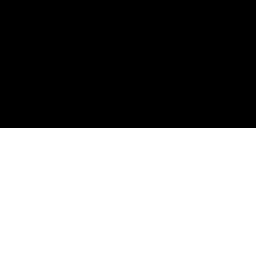

In [7]:
# Pattern 5
pattern5 = np.zeros([256,256],dtype=np.uint8)
pattern5[128:256,0:256] = 255
cv2_imshow(pattern5)

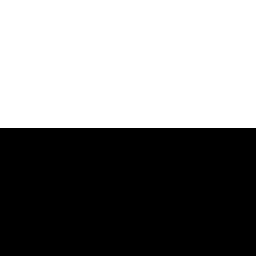

In [8]:
# Pattern 6
pattern6 = np.zeros([256,256],dtype=np.uint8)
pattern6[0:128,0:256] = 255
cv2_imshow(pattern6)

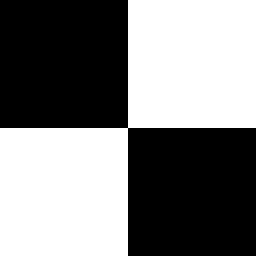

In [9]:
# Pattern 7
pattern7 = np.zeros([256,256],dtype=np.uint8)
pattern7[0:128,128:256] = 255
pattern7[128:256,0:128] = 255
cv2_imshow(pattern7)

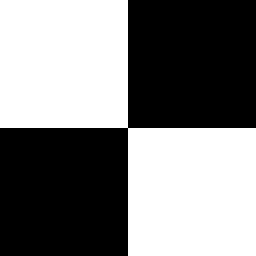

In [10]:
# Pattern 8
pattern8 = np.zeros([256,256],dtype=np.uint8)
pattern8[0:128,0:128] = 255
pattern8[128:256,128:256] = 255
cv2_imshow(pattern8)

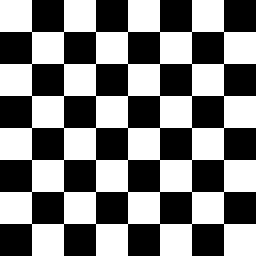

In [11]:
# Pattern 9
pattern9 = np.zeros([256,256],dtype=np.uint8)
row = 0
col = 0
alter = 0
square = pattern9.shape[0] // 8
for row in range(0,pattern9.shape[0],square):
  for col in range(0,pattern9.shape[1],square):
    if alter%2==0:
      pattern9[row:row+square,col:col+square] = 255
    alter+=1
  alter-=1
cv2_imshow(pattern9)

2. Simple **arithmetic operations** on images

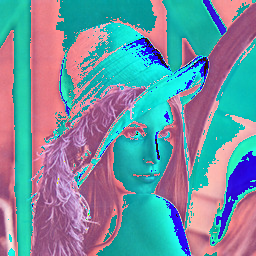

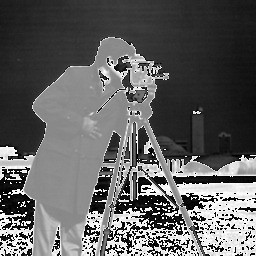

In [12]:
# Adding a constant
def const_addition(image,const):
  image = cv2.imread(image)
  image += const
  return cv2_imshow(image)

const_addition('Lenna.jpeg',57)
const_addition('Cameraman.jpeg',128)

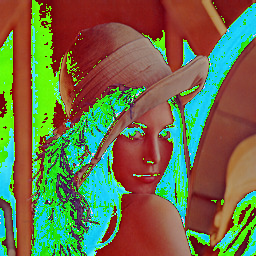

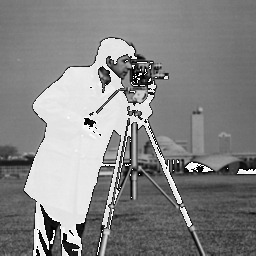

In [13]:
# Subtracting a constant
def const_subtraction(image,const):
  image = cv2.imread(image)
  image -= const
  return cv2_imshow(image)

const_subtraction('Lenna.jpeg',71)
const_subtraction('Cameraman.jpeg',38)

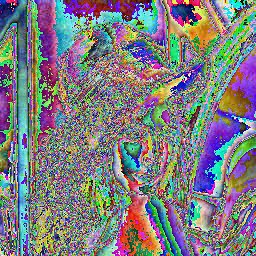

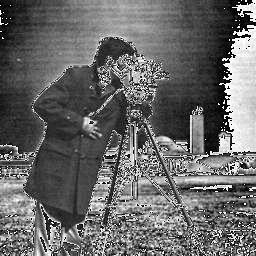

In [14]:
# Multiplying a constant
def const_multiplication(image,const):
  image = cv2.imread(image)
  image *= const
  return cv2_imshow(image)

const_multiplication('Lenna.jpeg',8)
const_multiplication('Cameraman.jpeg',5)

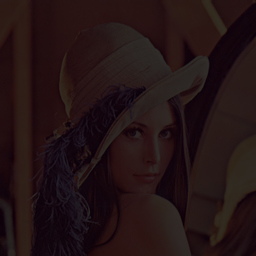

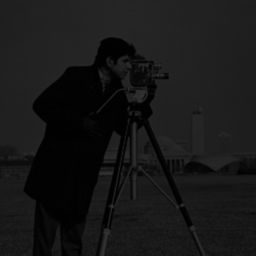

In [15]:
# Dividing a constant
def const_division(image,const):
  image = cv2.imread(image)
  image //= const
  return cv2_imshow(image)

const_division('Lenna.jpeg',5)
const_division('Cameraman.jpeg',5)

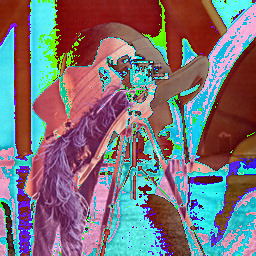

In [16]:
# Addition of two images
def image_addition(image1,image2):
  image1 = cv2.imread(image1)
  image2 = cv2.imread(image2)
  added_image = image1+image2
  return cv2_imshow(added_image)

image_addition('Lenna.jpeg','Cameraman.jpeg')

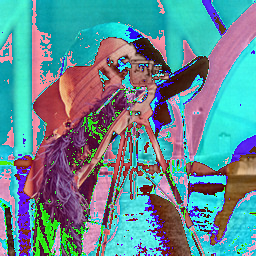

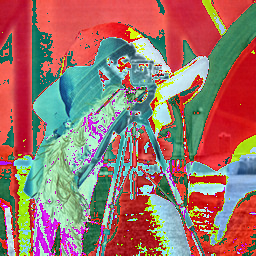

(None, None)

In [17]:
# Subtraction of two images
def image_subtraction(image1,image2):
  image1 = cv2.imread(image1)
  image2 = cv2.imread(image2)
  subtracted_image1 = image1-image2
  subtracted_image2 = image2-image1
  return cv2_imshow(subtracted_image1), cv2_imshow(subtracted_image2)

image_subtraction('Lenna.jpeg','Cameraman.jpeg')

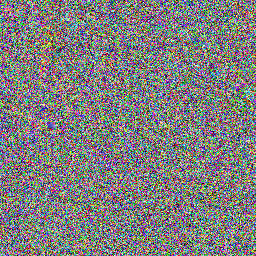

In [18]:
# Multiplication of two images
def image_multiplication(image1,image2):
  image1 = cv2.imread(image1)
  image2 = cv2.imread(image2)
  multiplied_image = image1*image2
  return cv2_imshow(multiplied_image)

image_multiplication('Lenna.jpeg','Cameraman.jpeg')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


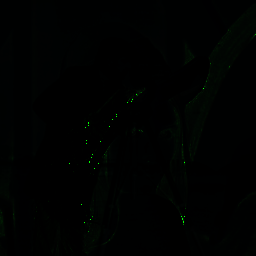

In [19]:
# Division of two images
def image_division(image1,image2):
  np.seterr(divide='ignore', invalid='ignore')
  image1 = cv2.imread(image1)
  image2 = cv2.imread(image2)
  divided_image = image2/image1
  return cv2_imshow(divided_image)

image_division('Lenna.jpeg','Cameraman.jpeg')

3. **Specific intensity search** operations on images

In [20]:
# Taking specific input intensity for search and count in images as:
# Lenna = [118, 131, 223]
# Cameraman = [58, 58, 58] 

def intensity_search(image,intensity):
  image = cv2.imread(image)
  count = np.count_nonzero((image == intensity).all(axis = 2))
  return count

intensity_lenna = [118, 131, 223]
intensity_cameraman = [58, 58, 58]

print('Specific intensities value:')
print('Lenna:',intensity_lenna)
print('Cameraman:',intensity_cameraman)
print('Specific intensities count:')
print('Lenna:',intensity_search('Lenna.jpeg',intensity_lenna))
print('Cameraman',intensity_search('Cameraman.jpeg',intensity_cameraman))


Specific intensities value:
Lenna: [118, 131, 223]
Cameraman: [58, 58, 58]
Specific intensities count:
Lenna: 5
Cameraman 82


4. **Special detection** operations on images

  * **Edge Detection**
  * **Point Detection**
  * **Line Detection**





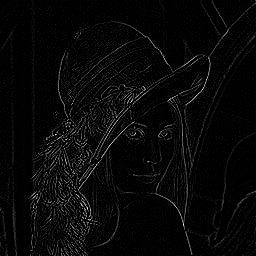

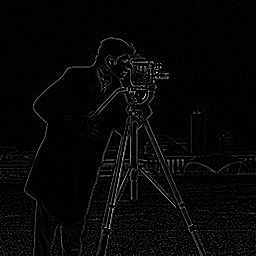

In [21]:
# Edge Detection
# Conversion to grayscale using inbuilt function (We could also use np.mean(image,-1))
# Using Laplacian operator to detect edge of the images
# Laplacian parameter ddepth=8 is the desired depth of the destination image

def edge_detection(image):
  image = cv2.imread(image)
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  laplacian = cv2.Laplacian(gray_image,8)
  return cv2_imshow(laplacian)

edge_detection('Lenna.jpeg')
edge_detection('Cameraman.jpeg')

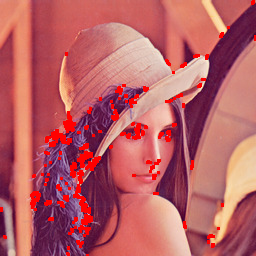

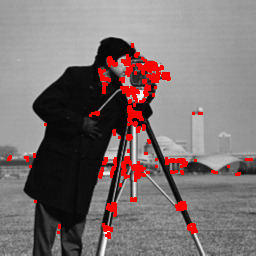

In [22]:
# Point Detection
# Using Harris Corner points to detect prominent points of the images 
# Harris corner parameters and values consist of: 
# grayscale image
# blocksize - size of neighbourhood = 2
# ksize - Aperture parameter of Sobel derivative = 5
# k - Harris detector free parameter = 0.05

def point_detection(image):
  image = cv2.imread(image)
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  kernel = np.ones((3,3), np.uint8)
  resp_image = cv2.dilate(cv2.cornerHarris(gray_image,2, 5, 0.05),kernel)
  image[resp_image>0.01*resp_image.max()]=[0,0,255]
  return cv2_imshow(image)

point_detection('Lenna.jpeg')
point_detection('Cameraman.jpeg')

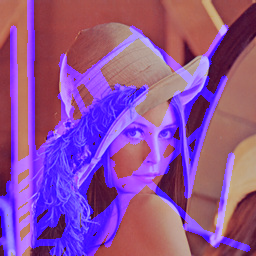

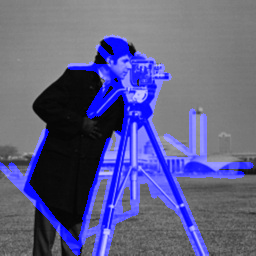

In [23]:
# Line Detection
# Using Probabilistic Hough Transform to detect lines present in the images
# HoughLines parameters and values consist of:
# rho - distance resolution of the Hough grid in pixels = 1
# theta - angular resolution of the Hough grid in radians = 0.01745 (pi/180)
# threshold - minimum number of intersections in Hough grid cell = 15
# minline_length - minimum number of pixels making up a line = 50
# maxline_gap - maximum gap between connectable line segments in pixels = 20
# Canny edge detector parameter consists of low threshold = 50 and high threshold = 150

def line_detection(image):
  image = cv2.imread(image)
  gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  gaussian_blur = cv2.GaussianBlur(gray_image,(5,5),0)
  edges = cv2.Canny(gaussian_blur,50,150)
  line_image = np.zeros_like(image)
  lines = cv2.HoughLinesP(edges,1,0.01745,15,np.array([]),50,20)
  for line in lines:
      for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
  lines_edges = cv2.addWeighted(image, 0.8, line_image, 1, 0)
  return cv2_imshow(lines_edges)

line_detection('Lenna.jpeg')
line_detection('Cameraman.jpeg')


5. **Image fusion** in spatial domain

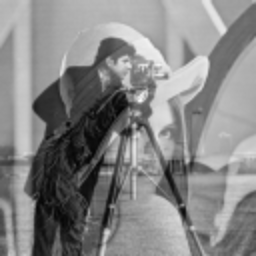

In [24]:
# Using PyWavelet library for image fusion
# Here mean fusion method is chosen to get the best results
# Fusion Algorithm: 
# 1.Apply wavelet transform on both images
# 2.Apply mean fusion method for each level in both images
# 3.Transfer the fused coefficients to get back the image
# 4.Normalize values and resize back to the original image size

def image_fusion(image1,image2):
  image1 = cv2.imread(image1)
  image2 = cv2.imread(image2)
  gray_image1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
  gray_image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
  wavelet = 'db1'
  coeff1 = pywt.wavedec2(gray_image1,wavelet)
  coeff2 = pywt.wavedec2(gray_image2,wavelet)
  coeff = coeff1[0]+coeff2[0] / 2
  fused_coeff = []
  fused_coeff.append(coeff)
  for i in range(1,len(coeff1)-1):
    c1 = (coeff1[i][0] + coeff2[i][0]) / 2
    c2 = (coeff1[i][1] + coeff2[i][1]) / 2
    c3 = (coeff1[i][2] + coeff2[i][2]) / 2
    fused_coeff.append((c1,c2,c3))
  fused_image = pywt.waverec2(fused_coeff,wavelet)
  fused_image = np.multiply(np.divide(fused_image - np.min(fused_image),(np.max(fused_image) - np.min(fused_image))),255)
  fused_image = cv2.resize(fused_image.astype(np.uint8),(image1.shape[0],image1.shape[1]))
  return cv2_imshow(fused_image)

image_fusion('Lenna.jpeg','Cameraman.jpeg')

6. **Image Thresholding**

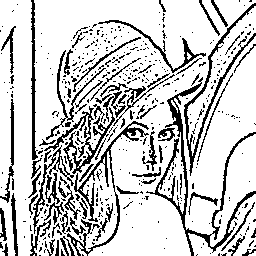

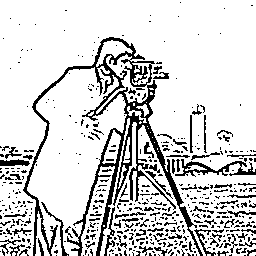

In [25]:
# There are different types of image thresholding: Binary Thresholding, To Zero Thresholding, Adaptive Thresholding, etc
# Here Adaptive Thresholding is used to distinguish foreground pixels from the background
# Applied a Gaussian blur to remove random noise
# Adaptive thresholding provides best results as the threshold value is determined for smaller regions and 
# therefore  varying threshold values exist for different regions

def image_thresholding(image):
  image = cv2.imread(image)
  gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  blurred_img = cv2.GaussianBlur(gray_image,(3,3),0)
  thresh_img = cv2.adaptiveThreshold(blurred_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,2)
  return cv2_imshow(thresh_img)

image_thresholding('Lenna.jpeg')
image_thresholding('Cameraman.jpeg')

7. **Image Segmentation**

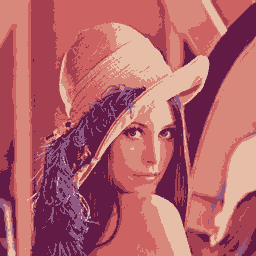

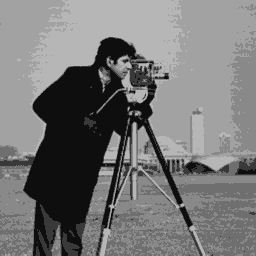

In [26]:
# There are different methods of image segmentation: Edge Based Segmentation, Region Based Segmentation, Clustering Based Segmentation,etc
# Here we pick Clustering Based Segmentation as it is very simple and easy to understand.
# k-means is one of the most commonly used clustering algorithms where k denotes the no. of clusters
# 1.Select k initial clusters randomly. Here chosen k = 6
# 2.Assign randomly any of the k clusters for each data point
# 3.Determine the cluster centres
# 4.Compute the distance between all points of each cluster centre
# 5.The points are assigned to the closest cluster depending on this distance.
# 6.Calculate the freshly formed cluster centre

def image_segmentation(image):
  image = cv2.imread(image)
  image_2d = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
  kmeans = KMeans(n_clusters=6).fit(image_2d)
  clust_image = kmeans.cluster_centers_[kmeans.labels_]
  segm_image = clust_image.reshape(image.shape[0], image.shape[1], image.shape[2])
  return cv2_imshow(segm_image)

image_segmentation('Lenna.jpeg')
image_segmentation('Cameraman.jpeg')

**Phase-II**

8.Discrete Cosine Transform (**DCT**) on images.

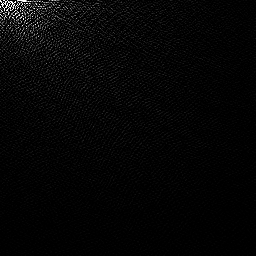

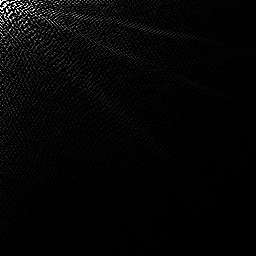

In [27]:
# Using OpenCV dct function

def dct(image):
  image = cv2.imread(image)  
  gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)  
  width = image.shape[0]
  height = image.shape[1]
  dct_image = np.zeros((width,height),dtype=np.float32)
  dct_image += gray_image[:width,:height]
  dct_image = cv2.dct(dct_image) 
  return cv2_imshow(dct_image)

dct('Lenna.jpeg')
dct('Cameraman.jpeg')

9.Inverse Discrete Cosine Transform (**IDCT**) on images

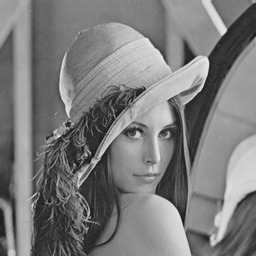

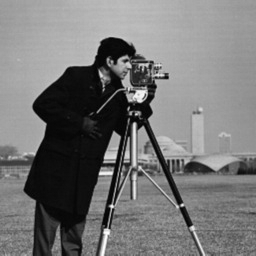

In [28]:
# Using OpenCV idct function

def dct(image):
  image = cv2.imread(image)  
  gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)   
  width = image.shape[0]
  height = image.shape[1]
  dct_image = np.zeros((width,height),dtype=np.float32)
  dct_image += gray_image[:width,:height]
  dct_image = cv2.dct(dct_image)
  idct_image = cv2.idct(dct_image) 
  return cv2_imshow(idct_image)

dct('Lenna.jpeg')
dct('Cameraman.jpeg')

10. **JPEG Image Compression**

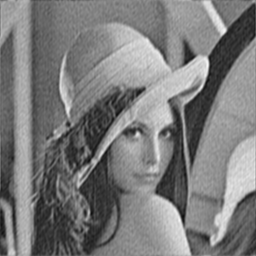

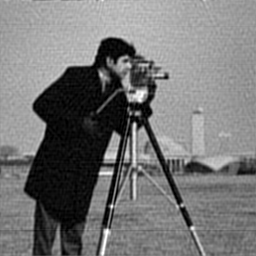

In [29]:
# Image Compression using Fourier Transform
# 1.Check if the file is in JPEG/JPG format
# 2.Apply Fourier Transform to image
# 3.Choose Compression percentage value,here 90% thus keeping the largest 10% fourier coefficients
# 4.Store all fourier coefficients having magnitude > threshold in index matrix
# 5.Apply Inverse Fourier Transform to obtain the compressed image

def compression(image):
  formats = ('.jpg','.jpeg')
  if os.path.splitext(image)[1].lower() in formats:
    image = cv2.imread(image)  
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
    fourier = np.fft.fft2(gray_image)
    fourier_sorted = np.sort(np.abs(fourier.reshape(-1)))
    comp_value = 0.9
    threshold = fourier_sorted[int(np.floor((comp_value)*len(fourier_sorted)))]
    index_mat = np.abs(fourier)>threshold
    compressed_image = np.fft.ifft2(fourier*index_mat).real
    return cv2_imshow(compressed_image)
  else:
    print("File type not supported")
    return None

compression('Lenna.jpeg')
compression('Cameraman.jpeg')

   

11. Discrete Wavelet Transform (**DWT**) on images

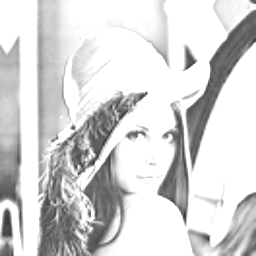

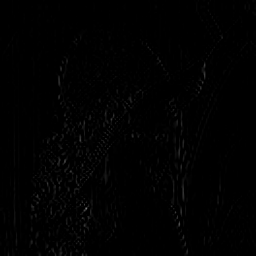

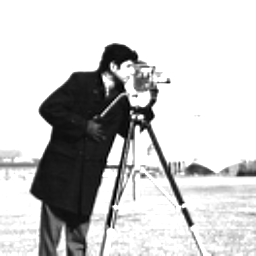

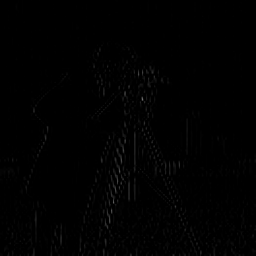

(None, None)

In [30]:
# Using PyWavelet library: dwt2 method and symmetric mode
# cA = Approximation Coefficient
# cH = Horizontal Detailed Coefficient
# cV = Vertical Detailed Coefficient
# cD = Diagonal Detailed Coefficient

def dwt(image):
  image = cv2.imread(image)  
  gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
  wavelet = 'db5'
  coeffs2 = pywt.dwt2(gray_image,wavelet,mode = 'symmetric')
  cA,(cH,cV,cD) = coeffs2
  cA = cv2.resize(cA,(image.shape[0],image.shape[1]))
  cH = cv2.resize(cH,(image.shape[0],image.shape[1]))
  cV = cv2.resize(cV,(image.shape[0],image.shape[1]))
  cD = cv2.resize(cD,(image.shape[0],image.shape[1]))
  return cv2_imshow(cA), cv2_imshow(cV)

dwt('Lenna.jpeg')
dwt('Cameraman.jpeg')


12. Inverse Discrete Wavelet Transform (**IDWT**) on images

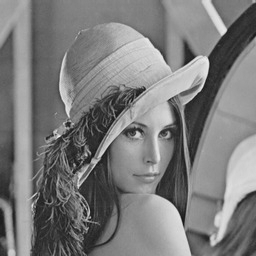

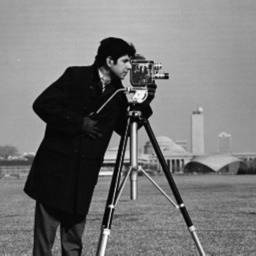

In [31]:
# Using PyWavelet library
# idwt2 method and symmetric mode

def idwt(image):
  image = cv2.imread(image)  
  gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
  wavelet = 'db5'
  coeffs2 = pywt.dwt2(gray_image,wavelet,mode = 'symmetric')
  reconst_image = pywt.idwt2(coeffs2,wavelet,mode = 'symmetric')
  reconst_image= np.uint8(reconst_image)
  return cv2_imshow(reconst_image)

idwt('Lenna.jpeg')
idwt('Cameraman.jpeg')


13. **Color Image Processing**:

  *   Color Replacement
  *   Color Detection
  *   Change of planes
  *   Color Space Transformations



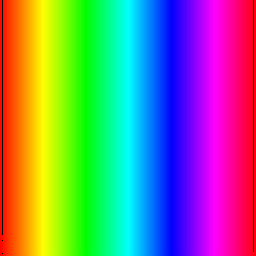

In [32]:
# Color Replacement
# Replacing a range of colors with a specific color 
# Here changing a leftmost and a right most strip => black

def color_replacement(image):
  image = cv2.imread(image) 
  image[np.where((image==[1,14,254]).all(axis=2))] = [0,0,0] 
  image[np.where((image==[22,1,254]).all(axis=2))] = [0,0,0]
  return cv2_imshow(image)

color_replacement('RGB Colors.jpeg')

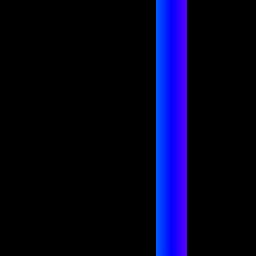

In [33]:
# Color Detection 
# Here blue is chosen as the color to detect
# Determine precisely lower ranges and upper ranges of the color to obtain results

def color_detection(image):
  image = cv2.imread(image)
  hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
  lower_range = np.array([110,50,50])
  upper_range = np.array([130,255,255])
  mask = cv2.inRange(hsv_image,lower_range,upper_range)
  detected_color = cv2.bitwise_and(image,image, mask= mask)
  return cv2_imshow(detected_color)

color_detection('RGB Colors.jpeg')

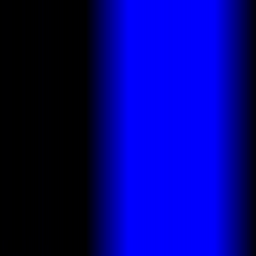

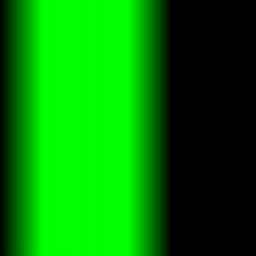

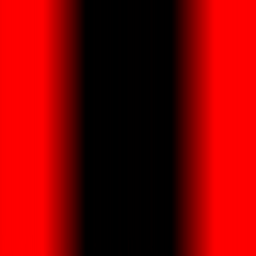

(None, None, None)

In [34]:
#Change of planes of image
# Blue Plane: Channel 0
# Green Plane: Channel 1
# Red Plane: Channel 2

def change_plane(image):
  image = cv2.imread(image)
  planes_blue, planes_green, planes_red = [np.zeros_like(image) for planes in range(3)]
  planes_blue[:,:,0], planes_green[:,:,1], planes_red[:,:,2] = [image[:,:,ch] for ch in range(3)]
  return cv2_imshow(planes_blue), cv2_imshow(planes_green), cv2_imshow(planes_red)

change_plane('RGB Colors.jpeg')


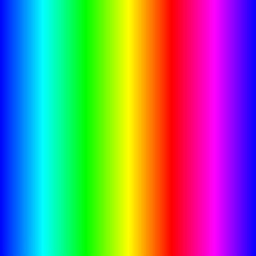

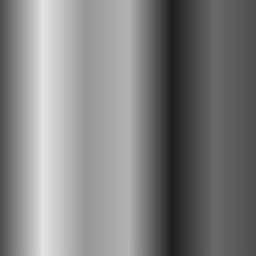

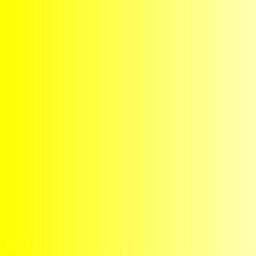

(None, None, None)

In [35]:
# Color Space Trasformations
# There are 150+ color-space conversion methods available in OpenCV 
# To view a list of all flags in OpenCV, run command =>
# flags = [i for i in dir(cv) if i.startswith('COLOR_')] where flag determines the type of conversion
# Here we have taken the top 3 common color spaces: RGB, GRAY, HSV

def color_space(image):
  image = cv2.imread(image)
  rgb_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
  return cv2_imshow(rgb_image), cv2_imshow(gray_image), cv2_imshow(hsv_image),

color_space('RGB Colors.jpeg')

**Phase-III**

14. **Video Processing**: Operations on videos
*   Extracting frames from videos
*   Playing video in reverse mode
*   Applying background subtraction on videos

In [ ]:
# Frame Extraction
# Reading videos using cv2.VideoCapture()
# Extracting and saving specific frames from the video using cv2.imwrite()
# Setting Frame Rate using cv2.CAP_PROP_POS_MSEC, here => 1 second

def frame_extract(video):
  video = cv2.VideoCapture(video)
  if video.isOpened() == False:
    return 'Error in opening the video'
  success,frame = video.read()  
  count = 0
  sec = 0
  while success:
    success,frame = video.read()
    if success == False:
      break    
    print('Extracted frame:',count)
    cv2_imshow(frame) 
    video.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    sec+= 1
    count += 1
  return

frame_extract('Traffic Management.mp4')

In [ ]:
# Playing video in reverse mode
# Practical way possible is to extract frames, buffer them and then reload them in reverse order.
# The problem is that two consecutive frames are most of the time very similar. 
# So, they encode a full frame from time to time then only send differences between the previous and current.
# Decoding is done in the same manner => decode a keyframe and then add differences for each new frame to obtain the current image.
# cv2.CAP_PROP_POS_FRAMES can be used but note that it consumes a lot of memory, hammering the CPU
# cv2.CAP_PROP_FRAME_COUNT is used to get the total no. of frames

def video_reverse(video):
  video = cv2.VideoCapture(video)
  if video.isOpened() == False:
    return 'Error in opening the video'
  frame_count = round(video.get(cv2.CAP_PROP_FRAME_COUNT)) - 1
  print("Initial frame:",frame_count)
  while frame_count >=0:
    video.set(cv2.CAP_PROP_POS_FRAMES, frame_count)
    success,frame = video.read()
    if success:
      cv2_imshow(frame)
      frame_count -= 1
      print('Next frame:',frame_count)
    else:
        break
  video.release()
  return

video_reverse('Traffic Management.mp4')

In [ ]:
# Background subtraction (BS) is a common and widely used technique for generating a foreground mask by using static cameras
# BS calculates the foreground mask performing a subtraction between the current frame and a background model,
# containing the static part of the scene or everything that can be considered as background given the characteristics of the observed scene.
# Setting Frame Rate using cv2.CAP_PROP_POS_MSEC, here => 0.5 second

def bg_subtract(video):
  video = cv2.VideoCapture(video)
  if video.isOpened() == False:
    return 'Error in opening the video'
  fgbg = cv2.createBackgroundSubtractorMOG2()
  success,frame = video.read()
  sec = 0
  while success:
      success,frame = video.read()
      if success == False:
        break
      fgmask = fgbg.apply(frame)
      video.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
      sec+= 0.5
      cv2_imshow(fgmask)
  video.release()
  return

bg_subtract('Traffic Management.mp4')


**Credits**: Joshin Rexy